In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
# adicionando aresta com pesos a G
G = nx.Graph()

In [32]:
#weights = [('a', 'b', 4), ('a', 'c', 2), ('b', 'c', 5), ('b', 'd', 10), ('c', 'd', 3), ('d', 'e', 7), ('c', 'e', 8)]
weights = [('a', 'b', 4),('a', 'h', 8),('b', 'h', 11),('b', 'c', 8),('c', 'd', 7),
           ('c', 'f', 4),('c', 'i', 2),('d', 'e', 9),('d', 'f', 14),('e', 'f', 10),
           ('f', 'g',2),('g', 'h', 1),('g', 'i', 6),('h', 'i', 7)]

In [33]:
G.add_weighted_edges_from(weights)

In [34]:
G.number_of_edges()

14

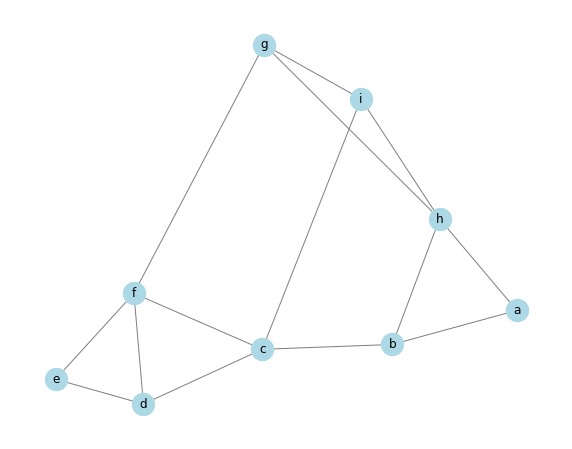

In [35]:
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8)) 
nx.draw_networkx(G, edge_color="grey", node_color="lightblue", node_size=500, with_labels=True, font_size=12)
plt.axis("off")
plt.show()

In [36]:
cweight = { (i,j) : d['weight'] for i,j,d in G.edges(data=True) }
cweight

{('a', 'b'): 4,
 ('a', 'h'): 8,
 ('b', 'h'): 11,
 ('b', 'c'): 8,
 ('h', 'g'): 1,
 ('h', 'i'): 7,
 ('c', 'd'): 7,
 ('c', 'f'): 4,
 ('c', 'i'): 2,
 ('d', 'e'): 9,
 ('d', 'f'): 14,
 ('f', 'e'): 10,
 ('f', 'g'): 2,
 ('i', 'g'): 6}

In [37]:
# Kruskal's algorithm with networkx
mst_kruskal = nx.minimum_spanning_edges(G, weight='weight', algorithm='kruskal', data=True)

In [38]:
type(mst_kruskal)

generator

In [39]:
edges_sol = [] # E_T
edges_sol_dic = {} #E_T com pesos
value_sol = 0
for u, v, d in mst_kruskal:
    e = tuple((u,v))
    edges_sol_dic[e] = d["weight"] 
    edges_sol.append(e)
    value_sol += d["weight"]

In [40]:
#print(u,v,d['weight'])
print(f"solution = {edges_sol_dic}")
print(f"value = {value_sol}")

solution = {('h', 'g'): 1, ('c', 'i'): 2, ('f', 'g'): 2, ('a', 'b'): 4, ('c', 'f'): 4, ('c', 'd'): 7, ('a', 'h'): 8, ('d', 'e'): 9}
value = 37


In [41]:
mst_kruskal = nx.minimum_spanning_edges(G, weight='weight', algorithm='kruskal', data=True)
kruskal_weight = sum(d['weight'] for u, v, d in mst_kruskal)
print(f"Kruskal's algorithm total weight: {kruskal_weight}")

Kruskal's algorithm total weight: 37


In [42]:
nodes = G.nodes()
nodes

NodeView(('a', 'b', 'h', 'c', 'd', 'f', 'i', 'e', 'g'))

In [43]:
edges = G.edges()
edges

EdgeView([('a', 'b'), ('a', 'h'), ('b', 'h'), ('b', 'c'), ('h', 'g'), ('h', 'i'), ('c', 'd'), ('c', 'f'), ('c', 'i'), ('d', 'e'), ('d', 'f'), ('f', 'e'), ('f', 'g'), ('i', 'g')])

In [44]:
T = nx.DiGraph()
T.add_edges_from(edges_sol)

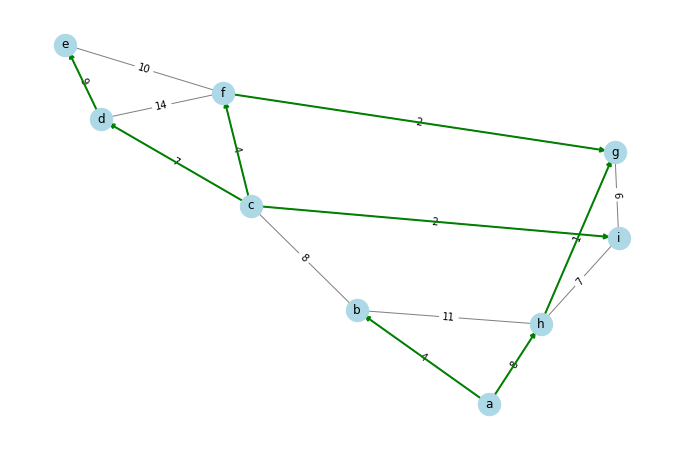

In [45]:
# Visualize the graph and the minimum spanning tree
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8)) 
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()